# 5-2 Piecewise Linear Interpolation – Exercises

This notebook contains Python reference solutions for the programming task of Section **5.2 – Piecewise linear interpolation**.

We implement:

* `hatfun(t, k)` – hat/basis function  
* `plinterp(t, y)` – callable piecewise-linear interpolant  
* Empirical convergence tests for three functions as required in Exercise 1.

Run all cells top-to-bottom.  Environment: Python ≥3.9, `numpy`, `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Hat (basis) function ---------------------------------------------------
def hatfun(t, k):
    """Return callable hat function H_k relative to nodes t."""
    n = len(t) - 1
    def H(x):
        if k > 0 and t[k-1] <= x <= t[k]:
            return (x - t[k-1]) / (t[k] - t[k-1])
        elif k < n and t[k] <= x <= t[k+1]:
            return (t[k+1] - x) / (t[k+1] - t[k])
        else:
            return 0.0
    return np.vectorize(H)

# --- Piecewise-linear interpolant ------------------------------------------
def plinterp(t, y):
    """Return callable PL interpolant for data (t, y)."""
    hats = [hatfun(t, k) for k in range(len(t))]
    def p(x):
        return sum(y[k] * hats[k](x) for k in range(len(t)))
    return np.vectorize(p)


In [2]:
def convergence_test(f, interval, ns):
    """Return (h, error) arrays for PL interpolation of f on interval."""
    a, b = interval
    xs = np.linspace(a, b, 1600)
    h, err = [], []
    for n in ns:
        t = np.linspace(a, b, n+1)
        p = plinterp(t, f(t))
        err.append(np.max(np.abs(f(xs) - p(xs))))
        h.append((b - a) / n)
    return np.array(h), np.array(err)


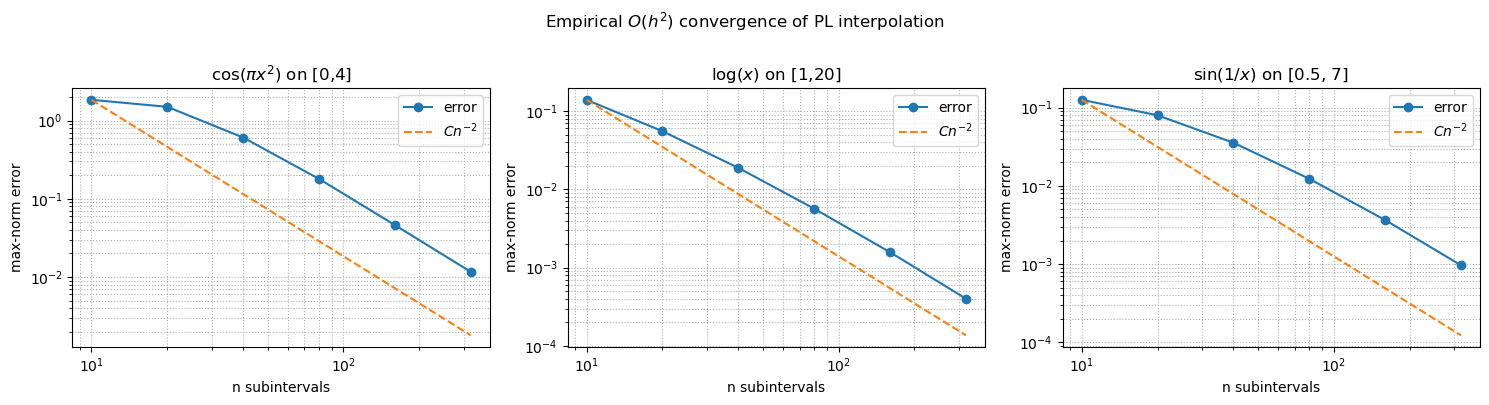

In [3]:
# --- Exercise 1 --------------------------------------------------------------
tests = {
    r"$\cos(\pi x^2)$ on [0,4]": (lambda x: np.cos(np.pi * x**2), (0.0, 4.0)),
    r"$\log(x)$ on [1,20]": (np.log, (1.0, 20.0)),
    r"$\sin(1/x)$ on [0.5, 7]": (lambda x: np.sin(1.0 / x), (0.5, 7.0)),
}

ns = np.array([10, 20, 40, 80, 160, 320])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (title, (f, interval)) in zip(axes, tests.items()):
    h, err = convergence_test(lambda x, f=f: f(x), interval, ns)
    ax.loglog(ns, err, 'o-', label='error')
    C = err[0] * ns[0]**2
    ax.loglog(ns, C / ns**2, '--', label=r'$Cn^{-2}$')
    ax.set_xlabel('n subintervals')
    ax.set_ylabel('max-norm error')
    ax.set_title(title)
    ax.grid(True, which='both', ls=':')
    ax.legend()
fig.suptitle('Empirical $O(h^2)$ convergence of PL interpolation', y=1.0)
plt.tight_layout()
plt.show()
